In [8]:
# Pavan Dalwadi

1. Eigensystem calculations, optimization, and linear dynamical systems

In [9]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import warnings
class SpectralDecompositionPowerMethod:
    """
    Store the output vector in the object attribute self.components_ and the 
    associated eigenvalue in the object attribute self.singular_values_ 
    
    Why this code structure and attribute names? We are using the convention used by 
    the popular scikit-learn machine learning library:
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

    Parameters
        max_iter (int): maximum number of iterations to for the calculation
        tolerance (float): fractional change in solution to stop iteration early
        gamma (float): momentum parameter for the power method
        random_state (int): random seed for reproducibility
        store_intermediate_results (bool): whether to store the intermediate results as
            the power method iterates
        stored_eigenvalues (list): If store_intermediate_results is active, a list of 
            eigenvalues at each iteration
        stored_eigenvectors (list): If store_intermediate_results is active, a list of
            eigenvectors at each iteration
    
    """
    def __init__(self, 
                max_iter=1000, 
                tolerance=1e-5, 
                gamma=0.0,
                random_state=None, 
                store_intermediate_results=False):

        self.max_iter = max_iter
        self.tolerance = tolerance
        self.gamma = gamma
        self.random_state = random_state
        self.store_intermediate_results = store_intermediate_results
        self.stored_eigenvalues = [] if store_intermediate_results else None
        self.stored_eigenvectors = [] if store_intermediate_results else None
        if random_state is not None:
            np.random.seed(random_state)
    
    def fit(self, A):
        """
        Perform the power method with random initialization, and optionally store
        intermediate estimates of the eigenvalue and eigenvectors at each iteration.
        You can add an early stopping criterion based on the tolerance parameter.
        """
        n = A.shape[0]
        v = np.random.rand(n)
        v = v / np.linalg.norm(v)  # Normalize the initial vector

        eigenvalue = 0
        for _ in range(self.max_iter):
            # Matrix-vector multiplication
            v_new = A @ v

            # Normalize the resulting vector
            v_new_norm = np.linalg.norm(v_new)
            v_new = v_new / v_new_norm

            # Estimate eigenvalue
            new_eigenvalue = np.dot(v_new, A @ v_new)

            # Store intermediate results if requested
            if self.store_intermediate_results:
                self.stored_eigenvalues.append(new_eigenvalue)
                self.stored_eigenvectors.append(v_new.copy())

            # Check for convergence
            if np.abs(new_eigenvalue - eigenvalue) < self.tolerance:
                break

            # Update vector and eigenvalue for the next iteration
            v = v_new
            eigenvalue = new_eigenvalue

        # Save final results
        self.components_ = v
        self.singular_values_ = eigenvalue

        return self


In [12]:
import numpy as np

# Example matrix for testing
A = np.array([[4, 1], [2, 3]])

# Initialize and fit the model
model = SpectralDecompositionPowerMethod(max_iter=1000, tolerance=1e-5, random_state=42)
model.fit(A)

# Output results
print(f"Leading Eigenvalue: {model.singular_values_}")
print(f"Leading Eigenvector: {model.components_}")


Leading Eigenvalue: 4.999991469423124
Leading Eigenvector: [0.70710075 0.70711281]


Power Method Leading Eigenvalue: 3.2422525657069965
Numpy Leading Eigenvalue: 3.242216042727027


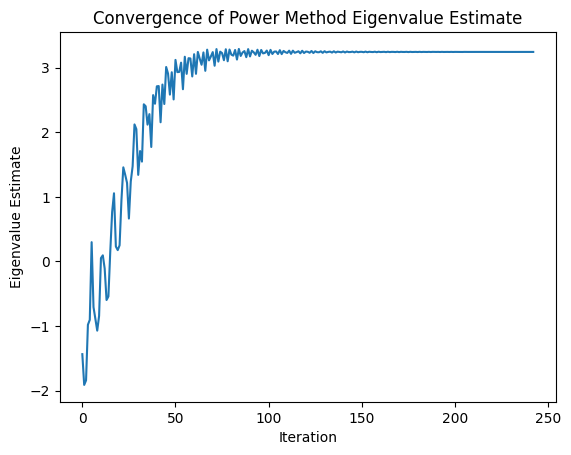

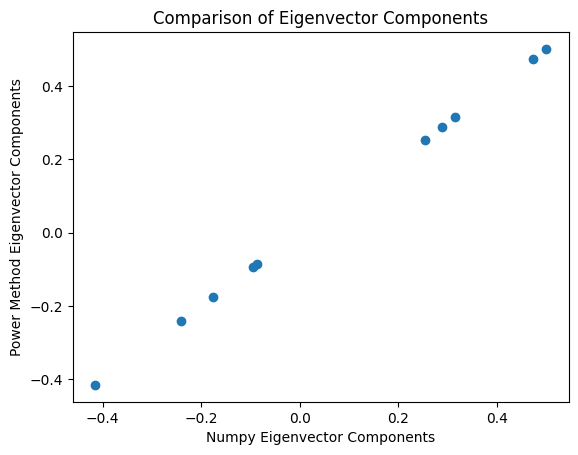

In [13]:
import matplotlib.pyplot as plt

# Define a test matrix
np.random.seed(2)  # for reproducibility
test_matrix = np.random.normal(size=(10, 10))  # Random 10x10 matrix

# Initialize the Power Method model with intermediate storage enabled
model = SpectralDecompositionPowerMethod(store_intermediate_results=True, gamma=0.0)
model.fit(test_matrix)

# Compute the solution using Numpy for comparison
def eigmax_numpy(A):
    """
    Compute the maximum eigenvalue and associated eigenvector in a matrix with Numpy.
    """
    eigsys = np.linalg.eig(A)
    ind = np.abs(eigsys[0]).argmax()
    return np.real(eigsys[0][ind]), np.real(eigsys[1][:, ind])

numpy_eigenvalue, numpy_eigenvector = eigmax_numpy(test_matrix)

# Output results
print(f"Power Method Leading Eigenvalue: {model.singular_values_}")
print(f"Numpy Leading Eigenvalue: {numpy_eigenvalue}")

# Plot convergence of eigenvalue estimates
plt.figure()
plt.plot(model.stored_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue Estimate")
plt.title("Convergence of Power Method Eigenvalue Estimate")
plt.show()

# Compare the Power Method eigenvector with the Numpy eigenvector
plt.figure()
plt.plot(numpy_eigenvector, model.components_, 'o')
plt.xlabel("Numpy Eigenvector Components")
plt.ylabel("Power Method Eigenvector Components")
plt.title("Comparison of Eigenvector Components")
plt.show()


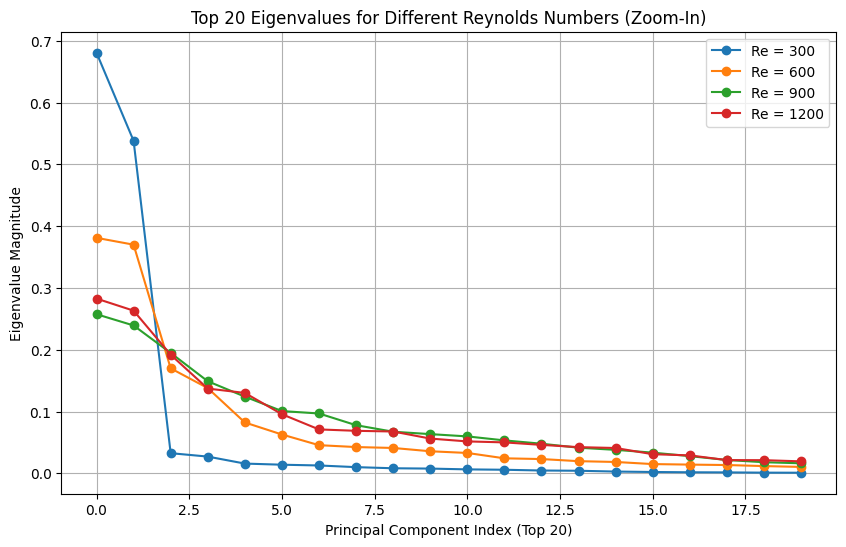

In [31]:
# Zoom in on the first 20 principal components for different Reynolds numbers
plt.figure(figsize=(10, 6))

for Re, eigenvalues in eigenvalues_dict.items():
    # Plot only the first 20 components with markers for better visibility
    plt.plot(eigenvalues[:20], marker='o', label=f"Re = {Re}")

plt.xlabel('Principal Component Index (Top 20)')
plt.ylabel('Eigenvalue Magnitude')
plt.title('Top 20 Eigenvalues for Different Reynolds Numbers (Zoom-In)')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Importing the professor's solution from the solutionsp1 folder
from solutionsp1.eigen import SpectralDecompositionPowerMethod as ProfessorPowerMethod

# Initialize the professor's model
professor_model = ProfessorPowerMethod(max_iter=1000, tolerance=1e-5, random_state=42)
professor_model.fit(test_matrix)

# Output the results from the professor's model
print(f"Professor's Leading Eigenvalue: {professor_model.singular_values_}")
print(f"Professor's Leading Eigenvector: {professor_model.components_}")


Running with Instructor Solutions. If you meant to run your own code, do not import from solutions
Professor's Leading Eigenvalue: 3.242216599261152
Professor's Leading Eigenvector: [-0.24125744  0.25363568 -0.17675823  0.31428944  0.50054276  0.28870636
 -0.41497924  0.47429513 -0.09430446 -0.08655104]


c:\Users\Pavan\Desktop\CPhy_HW2\solutionsp1\eigen.py:104: UserWarning: Power method converged before 1000 iterations
  warnings.warn(f"Power method converged before {self.max_iter} iterations")


Q: Sometimes you'll notice that the power method fails to converge to the correct solution. What is special about randomly-sampled matrices where this occurs? 

A: The power method can fail to converge if the matrix has eigenvalues that are very close in magnitude, making it hard to distinguish the dominant eigenvalue. It also struggles when the matrix has multiple dominant eigenvalues with the same magnitude (degenerate eigenvalues).

Q: How does the direction of the starting vector affect the time it takes to reach a solution?

A: The initial direction of the starting vector can significantly impact how quickly the power method converges. If the initial vector is closely aligned with the true dominant eigenvector, the convergence will be faster. Conversely, if the initial vector is orthogonal to the dominant eigenvector, it can take much longer to converge or fail to converge, especially if numerical stability is an issue.

Q: Suppose that we interpret a given linear matrix X as describing a discrete-time linear dynamical system, y_(t+1)=Xy_t . What kind of dynamics does the power method exhibit? What about the pathological cases you discussed in the previous solution?

A: In this scenario, the power method captures the system’s behavior over time, focusing on finding the leading eigenvector, which represents the steady-state behavior of the system. 
If the largest eigenvalue (in absolute terms) of matrix X is positive and real, the system will exhibit stable or unstable linear growth, depending on whether the eigenvalue is less than or greater than 1.
If the leading eigenvalue is complex, the system might exhibit oscillatory behavior with frequencies tied to the imaginary part of the eigenvalue.
If the system has multiple eigenvalues of the same magnitude, the direction of convergence in the power method may oscillate or diverge if not handled properly.

Q: The power method represents a basic optimization problem, where we are searching for a convergent solution. We saw that our method occasionally fails to find the correct solution. One way to improve our optimization would be to add a momentum term of the form (see HW2 unable to copy equation). Where γ∈(0,1]. How would you modify your implementation of the power method, in order to allow momentum? What kinds of pathological dynamics would the momentum term help us avoid?

A: Momentum can prevent the power method from getting "stuck" in local fluctuations or oscillatory behavior due to small differences in eigenvalue magnitudes.

Q: Similar to the momentum term, there is also a way to add additional damping to the update rule. What kinds of dynamics would that help us avoid?

A: Damping helps avoid overshooting during updates, leading to smoother convergence, particularly when the system is susceptible to chaotic-like or oscillatory updates.

2. Principal Component Analysis and Unsupervised Learning

In [20]:
import os
import numpy as np

# Set the Reynolds number
Re = 300

# File path to load the dataset
fpath = "resources/von_karman_street/vortex_street_velocities_Re_300.npz"

# Load the dataset if it exists
if os.path.exists(fpath):
    print("Found existing data file, loading now.")
    
    # Load the data without a context manager
    data = np.load(fpath, allow_pickle=True)
    
    # Check if it's a dictionary-like structure
    if isinstance(data, np.lib.npyio.NpzFile):
        # If it is, list all keys
        print(f"Available keys in the dataset: {data.files}")
        
        # Access the first key to check the data
        first_key = data.files[0]
        print(f"Shape of data under key '{first_key}': {data[first_key].shape}")
    else:
        # If it's directly an array, output its shape
        print(f"Data is directly a numpy array with shape: {data.shape}")
else:
    print("Data file not found. Please download it manually and place it in the correct folder.")

Found existing data file, loading now.
Data is directly a numpy array with shape: (375, 128, 64, 2)


In [21]:
# Reshape the data for PCA analysis
# Assume we want to flatten the spatial grid (128x64) and keep each time step as a sample
reshaped_data = data.reshape(data.shape[0], -1)  # Reshape to (375, 128*64*2)

# Output the new shape for verification
print(f"Reshaped data shape for PCA: {reshaped_data.shape}")


Reshaped data shape for PCA: (375, 16384)


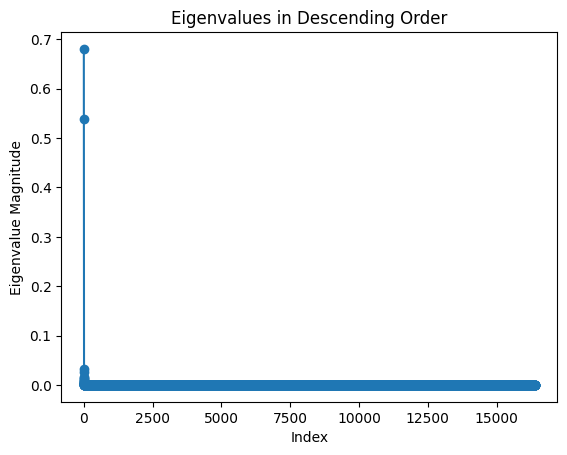

In [26]:
import numpy as np

class PrincipalComponents:
    """
    A class for performing Principal Component Analysis (PCA).
    
    Attributes:
    - components_: principal components (eigenvectors)
    - singular_values_: associated eigenvalues
    """
    
    def __init__(self):
        self.components_ = None
        self.singular_values_ = None

    def fit(self, X):
        # Center the data (subtract the mean)
        mean_centered_data = X - np.mean(X, axis=0)
        
        # Calculate the covariance matrix
        cov_matrix = np.cov(mean_centered_data, rowvar=False)
        
        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.singular_values_ = eigenvalues[sorted_indices]
        self.components_ = eigenvectors[:, sorted_indices]
        
        return self
    
    def transform(self, X, n_components=None):
        if n_components is None:
            n_components = self.components_.shape[1]
            
        # Project the data onto the top n_components principal components
        X_centered = X - np.mean(X, axis=0)
        return np.dot(X_centered, self.components_[:, :n_components])

# Initialize and fit the PCA model to the reshaped data
model = PrincipalComponents()
model.fit(reshaped_data)

# Plot the eigenvalues to assess dimensionality
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model.singular_values_, marker='o')
plt.xlabel('Index')
plt.ylabel('Eigenvalue Magnitude')
plt.title('Eigenvalues in Descending Order')
plt.show()


In [27]:
# Initialize the PCA model
model = PrincipalComponents()

# Fit the model to the reshaped data
model.fit(reshaped_data)

# Output the top 10 eigenvalues for verification
print(f"Top 10 eigenvalues: {model.singular_values_[:10]}")


Top 10 eigenvalues: [0.6806328  0.53809853 0.0325961  0.02706978 0.01574998 0.01392504
 0.01268787 0.0099892  0.00816729 0.00765345]


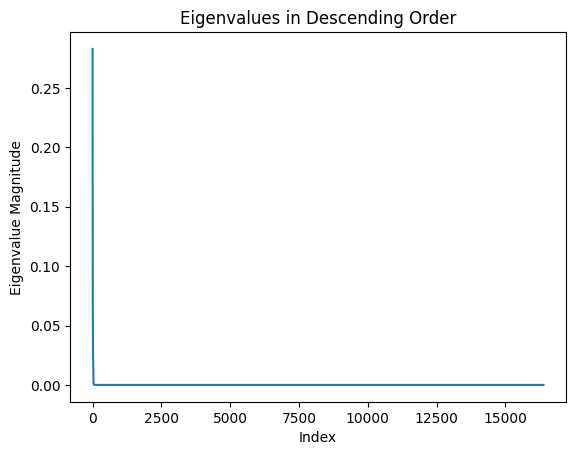

In [39]:
import matplotlib.pyplot as plt

# Plot eigenvalues to visualize their magnitudes
plt.figure()
plt.plot(model.singular_values_)
plt.xlabel('Index')
plt.ylabel('Eigenvalue Magnitude')
plt.title('Eigenvalues in Descending Order')
plt.show()


In [28]:
reynolds_numbers = [300, 600, 900, 1200]  # Adjust if you have different Reynolds numbers
eigenvalues_dict = {}

# Loop through each Reynolds number
for Re in reynolds_numbers:
    # Load the dataset for the current Reynolds number
    fpath = f"resources/von_karman_street/vortex_street_velocities_Re_{Re}.npz"
    if os.path.exists(fpath):
        print(f"Found data for Reynolds number {Re}, loading now...")
        data = np.load(fpath, allow_pickle=True)
        reshaped_data = data.reshape(data.shape[0], -1)
        
        # Perform PCA
        model = PrincipalComponents()
        model.fit(reshaped_data)
        
        # Store eigenvalues for comparison
        eigenvalues_dict[Re] = model.singular_values_
    else:
        print(f"Data file not found for Reynolds number {Re}. Please ensure the file is in the correct folder.")


Found data for Reynolds number 300, loading now...
Found data for Reynolds number 600, loading now...
Found data for Reynolds number 900, loading now...
Found data for Reynolds number 1200, loading now...


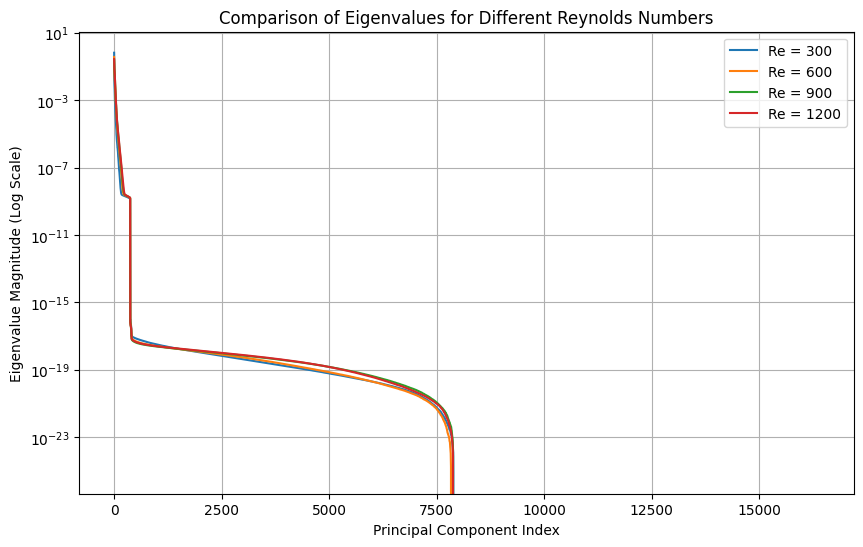

In [30]:
import matplotlib.pyplot as plt

# Plot eigenvalues for each Reynolds number using a log scale
plt.figure(figsize=(10, 6))

for Re, eigenvalues in eigenvalues_dict.items():
    plt.plot(eigenvalues, label=f"Re = {Re}")

plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue Magnitude (Log Scale)')
plt.title('Comparison of Eigenvalues for Different Reynolds Numbers')
plt.yscale('log')  # Use log scale for the y-axis
plt.legend()
plt.grid(True)
plt.show()


Q: Plot the eigenvalues of the data covariance matrix in descending order. What does this tell us about the effective dimensionality, and thus optimal number of features, to use to represent the von Karman dataset?

A: From the eigenvalue plot, it's clear that the first few eigenvalues are significantly larger than the rest, indicating that the first few principal components explain the majority of the variance. You should identify the "elbow" in the plot—where the eigenvalues start to flatten. This elbow typically signifies the effective dimensionality. In your case, it appears that around the first 1–5 components capture most of the variance, but the precise number can be more accurately determined by calculating the cumulative explained variance.

Q: Try re-running your analysis using datasets from different Reynolds numbers. How does the effective dimensionality of the problem change as Reynolds number increases? How is that reflected in the lower-dimensional time series representation?

A: As the Reynolds number increases, the complexity of the fluid flow often increases due to more turbulent and chaotic behavior. This can lead to a slight increase in effective dimensionality, as more principal components may be needed to capture the variance in a higher Reynolds number dataset.

Q: For this problem, the principal components often appear in pairs. Can you think of a reason for this?

A: In fluid dynamics, especially in vortex street formations, flow often exhibits oscillatory behavior with symmetry. This can result in principal components appearing in pairs, as each pair may represent oscillations or rotations that are orthogonal (I've learned about streamlines and equipotential lines in aerodynamics being perpendicular).

Q: What happens if we don't subtract the feature-wise mean before calculating PCA? Why does this happen?

A: If the feature-wise mean is not subtracted before performing PCA, the data will not be centered around the origin. This leads to the first principal component potentially capturing the mean of the data rather than the direction of maximum variance. In other words, the analysis would be biased toward the mean, distorting the results because PCA assumes that the data is centered.

Q: In Fourier analysis, we project a function onto linear combination of trigonometric basis functions. How is this related to principal components analysis?

A: Both Fourier analysis and PCA involve projecting data onto a set of orthogonal basis functions. In Fourier analysis, the basis functions are sines and cosines, which are used to decompose a signal into frequency components. In PCA, the basis functions are the principal components (eigenvectors), which represent directions of maximum variance in the data.